<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-quest-challenge-dsi-2025/blob/main/notebooks/DCM_DMU_2025_Notebook_Cubit_Aku_Dong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Pendahuluan**

Selamat datang pada analisis komprehensif kami untuk **Data Quest Challenge DSI MeetUp 2025**. Dalam *notebook* ini, tim **Cubit Aku Dong** akan memaparkan seluruh proses pengembangan model prediktif, mulai dari pemahaman data hingga generasi prediksi akhir. Fokus utama kami adalah menjawab tantangan yang diajukan, yaitu memprediksi kecenderungan nasabah bank untuk berlangganan produk deposito berjangka.

### **1.1. Latar Belakang Masalah**

Dalam dinamika industri perbankan yang kompetitif, kemampuan untuk memahami dan mengantisipasi perilaku nasabah merupakan aset strategis. Salah satu produk finansial yang umum ditawarkan adalah deposito berjangka, yang memberikan tingkat pengembalian tetap dalam periode waktu tertentu. Efektivitas kampanye pemasaran untuk produk ini sangat bergantung pada ketepatan penargetan nasabah. Mengidentifikasi segmen nasabah yang paling responsif tidak hanya meningkatkan tingkat konversi tetapi juga mengoptimalkan alokasi sumber daya pemasaran. Tantangan yang dihadapi adalah bagaimana memanfaatkan data historis nasabah untuk membangun sebuah sistem cerdas yang mampu memprediksi potensi minat mereka terhadap penawaran deposito.

### **1.2. Tujuan Proyek & Metrik Evaluasi (AUC)**

Proyek ini bertujuan untuk mengembangkan sebuah model *machine learning* klasifikasi yang handal dan akurat dengan kapabilitas sebagai berikut:

1.  **Mengklasifikasikan Nasabah**: Model diharapkan mampu membedakan nasabah ke dalam dua kategori utama:
    *   **Kelas 1**: Nasabah yang diprediksi **akan** berlangganan deposito berjangka.
    *   **Kelas 0**: Nasabah yang diprediksi **tidak akan** berlangganan deposito berjangka.
2.  **Mengidentifikasi Faktor Pengaruh**: Secara implisit, melalui analisis fitur, diharapkan dapat tergali faktor-faktor demografis, perilaku, atau interaksi sebelumnya yang signifikan memengaruhi keputusan nasabah.

Kinerja model akan dievaluasi secara kuantitatif menggunakan metrik **Area Under the Receiver Operating Characteristic Curve (AUC)**. AUC merupakan ukuran agregat dari performa model klasifikasi di semua ambang batas klasifikasi yang mungkin. Nilai AUC berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi mengindikasikan kemampuan diskriminasi model yang lebih baik antara kelas positif dan negatif. Dalam konteks ini, model dengan AUC yang tinggi akan lebih efektif dalam mengidentifikasi nasabah yang benar-benar berpotensi berlangganan.

### **1.3. Deskripsi Dataset (Ringkasan dari Guideline)**

Analisis ini akan didasarkan pada dataset yang disediakan oleh panitia kompetisi. Dataset tersebut mencakup informasi historis mengenai nasabah bank, yang terdiri dari berbagai atribut, termasuk:

*   **Informasi Demografis**: Seperti usia, pekerjaan, status perkawinan, dan tingkat pendidikan.
*   **Riwayat Keuangan & Perbankan**: Seperti status gagal bayar sebelumnya, kepemilikan pinjaman rumah atau pribadi.
*   **Detail Interaksi Kampanye**: Seperti jenis kontak, bulan dan hari kontak terakhir, serta jumlah kontak selama kampanye saat ini dan sebelumnya.
*   **Indikator Ekonomi Makro**: Seperti tingkat variasi pekerjaan, indeks harga konsumen, indeks kepercayaan konsumen, dan suku bunga Euribor.
*   **Variabel Target**: Kolom `berlangganan_deposito` yang mengindikasikan apakah nasabah akhirnya berlangganan produk deposito (1 jika ya, 0 jika tidak).

Dataset akan terbagi menjadi dua bagian utama:
1.  **Dataset Pelatihan (Training Set)**: Digunakan untuk melatih dan mengembangkan model prediktif. Dataset ini mencakup fitur-fitur prediktor beserta variabel target.
2.  **Dataset Validasi (Validation Set)**: Digunakan untuk menghasilkan prediksi akhir yang akan disubmit. Dataset ini hanya berisi fitur-fitur prediktor tanpa variabel target.


### **1.4. Alur Kerja Proyek**

Untuk mencapai tujuan yang telah ditetapkan, kami akan mengikuti serangkaian tahapan metodologis yang terstruktur sebagai berikut:

1.  **Persiapan Lingkungan & Pemuatan Data**
    - Mengatur *environment* kerja, mengimpor *library* yang relevan, dan memuat dataset pelatihan serta validasi.
2.  **Eksplorasi Data Awal (Initial EDA)**
    - Melakukan analisis mendalam terhadap dataset untuk memahami karakteristik, distribusi, korelasi antar fitur, serta mengidentifikasi potensi masalah seperti *missing values* atau *outliers*.
3.  **Pra-pemrosesan Data (Data Preprocessing)**
    - Menangani *missing values*, *outliers*, melakukan *encoding* pada fitur kategorikal, dan transformasi fitur numerik agar data siap untuk pemodelan.
4.  **Rekayasa Fitur (Feature Engineering)**
    - Menciptakan fitur-fitur baru yang potensial atau melakukan seleksi fitur untuk meningkatkan performa model.
5.  **Pemodelan (Modeling)**
    - Mengeksplorasi berbagai algoritma klasifikasi, melatih model, dan melakukan evaluasi awal menggunakan teknik validasi silang.
6.  **Penyetelan Hiperparameter (Hyperparameter Tuning)**
    - Mengoptimalkan parameter dari model-model kandidat terbaik untuk mencapai performa maksimal.
7.  **Evaluasi Model Final**
    - Menganalisis performa model terbaik pada data yang relevan dan memastikan robustisitasnya.
8.  **Pembuatan File Submission**
    - Menghasilkan prediksi probabilitas pada dataset validasi menggunakan model final dan menyusunnya sesuai format yang ditentukan.
9.  **Kesimpulan & Refleksi**
    - Merangkum temuan utama, tantangan yang dihadapi, dan potensi pengembangan lebih lanjut.

Setiap tahapan akan didokumentasikan secara detail dalam *notebook* ini untuk memastikan transparansi dan reproduktifitas hasil.

## **2. Persiapan Lingkungan & Import Librar**y

Tahap ini bertujuan untuk mempersiapkan lingkungan kerja serta mengimpor semua pustaka (library) Python yang akan kita gunakan sepanjang proyek ini. Pengaturan konfigurasi awal juga dilakukan di sini untuk memastikan reproduktifitas hasil dan tampilan output yang lebih baik.

### **2.1. Pengaturan Konfigurasi Awal**

Pengaturan ini mencakup penetapan *random seed* untuk konsistensi hasil pada operasi yang melibatkan proses acak, serta konfigurasi tampilan untuk *library* Pandas agar output data lebih mudah dibaca.

In [21]:
import os
import random
import numpy as np
import pandas as pd

# Pengaturan Random Seed untuk Reproduktifitas
SEED = 42  # Angka seed bisa dipilih bebas, 42 adalah pilihan populer
def set_seed(seed=SEED):
    """Mengatur random seed untuk berbagai library."""
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    # Jika menggunakan TensorFlow atau PyTorch, tambahkan pengaturan seed mereka di sini
    # tf.random.set_seed(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed_all(seed) # jika menggunakan CUDA
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = False
    print(f"Random seed set to {seed}")

set_seed()

# Pengaturan Opsi Tampilan Pandas
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom DataFrame
pd.set_option('display.max_rows', 100)      # Menampilkan maksimal 100 baris DataFrame
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Format angka float menjadi 3 desimal
pd.set_option('display.width', 1000)        # Mengatur lebar tampilan output

# (Opsional) Menonaktifkan Peringatan yang Tidak Kritis (gunakan dengan bijak)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
# warnings.filterwarnings('ignore', category=DeprecationWarning) # Hati-hati jika menggunakan ini

Random seed set to 42


### **2.2. Import Library yang Dibutuhkan**

Berikut adalah daftar *library* utama yang akan digunakan dalam proyek ini. Kebutuhan *library* mungkin akan bertambah seiring dengan pengembangan solusi.

*   **Manipulasi Data**: `numpy` dan `pandas`.
*   **Visualisasi Data**: `matplotlib` dan `seaborn`.
*   **Pra-pemrosesan & Pemodelan**: `scikit-learn`.
*   **(Opsional) Model Boosting Lanjutan**: `xgboost`, `lightgbm`, `catboost`.
*   **(Opsional) Penanganan Imbalance**: `imblearn`.

In [22]:
# Sel Kode untuk Import Library

# --- Manipulasi Data ---
import numpy as np
import pandas as pd

# --- Visualisasi Data ---
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid') # Menggunakan style visualisasi yang lebih menarik
# Alternatif style: 'ggplot', 'fivethirtyeight', 'seaborn-v0_8-darkgrid'
# Untuk memastikan plot tampil inline di notebook
%matplotlib inline

# --- Pra-pemrosesan Data dari Scikit-learn ---
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Algoritma Model dari Scikit-learn ---
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# --- Model Boosting Lanjutan  ---
# import xgboost as xgb
# from xgboost import XGBClassifier
# import lightgbm as lgb
# from lightgbm import LGBMClassifier
# import catboost as cb
# from catboost import CatBoostClassifier

# --- Metrik Evaluasi dari Scikit-learn ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# --- (Opsional) Penanganan Imbalance dari Imbalanced-learn  ---
# from imblearn.over_sampling import SMOTE, ADASYN
# from imblearn.under_sampling import RandomUnderSampler, NearMiss
# from imblearn.pipeline import Pipeline as ImbPipeline # Untuk pipeline dengan imblearn


# --- (Opsional) Library untuk analisis statistik atau fitur lainnya ---
# import scipy.stats as stats

print("Semua library dasar telah diimpor.")
# Cek versi library penting (opsional, tapi baik untuk debugging)
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
import sklearn
print(f"Scikit-learn version: {sklearn.__version__}")
# print(f"XGBoost version: {xgb.__version__}") # Uncomment jika xgboost diimpor
# print(f"LightGBM version: {lgb.__version__}") # Uncomment jika lightgbm diimpor
# print(f"CatBoost version: {cb.__version__}") # Uncomment jika catboost diimpor
# import imblearn # Uncomment jika imblearn diimpor
# print(f"Imbalanced-learn version: {imblearn.__version__}") # Uncomment jika imblearn diimpor

Semua library dasar telah diimpor.
Pandas version: 2.2.2
NumPy version: 2.0.2
Scikit-learn version: 1.6.1


## **3. Pemuatan Data (Data Loading)**

### **3.1. Mendefinisikan Path ke Dataset (Training & Validation)**

In [23]:
train_path = 'https://raw.githubusercontent.com/LatiefDataVisionary/data-quest-challenge-dsi-2025/refs/heads/main/datasets/raw/training_dataset.csv'

validation_path = 'https://raw.githubusercontent.com/LatiefDataVisionary/data-quest-challenge-dsi-2025/refs/heads/main/datasets/raw/validation_set.csv'

print(f"Path dataset training: {train_path}")
print(f"Path dataset validasi: {validation_path}")

Path dataset training: https://raw.githubusercontent.com/LatiefDataVisionary/data-quest-challenge-dsi-2025/refs/heads/main/datasets/raw/training_dataset.csv
Path dataset validasi: https://raw.githubusercontent.com/LatiefDataVisionary/data-quest-challenge-dsi-2025/refs/heads/main/datasets/raw/validation_set.csv


### **3.2. Membaca Dataset Training (`df_train`)**

In [24]:
try:
    df_train_original = pd.read_csv(train_path)
    print("Dataset training berhasil dimuat.")
    # Membuat salinan untuk menjaga data asli jika diperlukan modifikasi signifikan
    df_train = df_train_original.copy()
except FileNotFoundError:
    print(f"Error: File dataset training tidak ditemukan di path: {train_path}")
    print("Pastikan path sudah benar atau file sudah ada di lokasi tersebut.")
    df_train = pd.DataFrame() # Membuat DataFrame kosong jika gagal
except Exception as e:
    print(f"Terjadi error saat memuat dataset training: {e}")
    df_train = pd.DataFrame() # Membuat DataFrame kosong jika gagal

Dataset training berhasil dimuat.


### **3.3. Membaca Dataset Validasi (`df_val`)**

In [25]:
try:
    df_val_original = pd.read_csv(validation_path)
    print("Dataset validasi berhasil dimuat.")
    # Membuat salinan untuk menjaga data asli
    df_val = df_val_original.copy()
except FileNotFoundError:
    print(f"Error: File dataset validasi tidak ditemukan di path: {validation_path}")
    print("Pastikan path sudah benar atau file sudah ada di lokasi tersebut.")
    df_val = pd.DataFrame() # Membuat DataFrame kosong jika gagal
except Exception as e:
    print(f"Terjadi error saat memuat dataset validasi: {e}")
    df_val = pd.DataFrame() # Membuat DataFrame kosong jika gagal

Dataset validasi berhasil dimuat.


### **3.4. Tinjauan Awal Data (Head, Tail, Shape, Info) untuk Kedua Dataset**

#### **3.4.1. Tinjauan Awal Dataset Training (`df_train`)**

**1. Lima baris pertama (head)**

In [27]:
df_train.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,fri,2,999,0,nonexistent,-1.700,94.215,-40.300,0.885,4991.600,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-0.100,93.200,-42.000,4.021,5195.800,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.400,93.918,-42.700,4.958,5228.100,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,wed,2,999,0,nonexistent,1.100,93.994,-36.400,4.859,5191.000,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,wed,3,999,0,nonexistent,1.400,93.444,-36.100,4.964,5228.100,Bali,0


**2. Lima baris terakhir (tail)**

In [28]:
df_train.tail()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
22911,680377,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,wed,2,999,0,nonexistent,1.400,93.444,-36.100,4.967,5228.100,Kalimantan,0
22912,505429,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,tue,2,999,0,nonexistent,-1.100,94.199,-37.500,0.880,4963.600,Bali,0
22913,308952,29,manajer,lajang,SMA,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.400,93.918,-42.700,4.962,5228.100,NTT,0
22914,865813,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,mon,2,999,0,nonexistent,1.400,94.465,-41.800,4.960,5228.100,NTB,0
22915,977067,49,pekerja kasar,menikah,Tidak Tamat SD,unknown,yes,no,telephone,may,thu,1,999,0,nonexistent,1.100,93.994,-36.400,4.855,5191.000,Papua,0


**3. Dimensi dataset (shape)**

In [29]:
print(f"Jumlah baris: {df_train.shape[0]}, Jumlah kolom: {df_train.shape[1]}")

Jumlah baris: 22916, Jumlah kolom: 22


**4. Informasi tipe data dan nilai non-null (info):**

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

**5. Jumlah nilai unik per kolom (nunique)**

In [31]:
pd.DataFrame(df_train.nunique(),columns=['Jumlah Nilai Unik'])

,Jumlah Nilai Unik
customer_number,22916
usia,78
pekerjaan,12
status_perkawinan,4
pendidikan,8
gagal_bayar_sebelumnya,3
pinjaman_rumah,3
pinjaman_pribadi,3
jenis_kontak,2
bulan_kontak_terakhir,10


**6. Distribusi variabel target 'berlangganan_deposito'**

In [34]:
df_train['berlangganan_deposito'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

,proportion
berlangganan_deposito,
0,88.59%
1,11.41%


#### **3.4.2. Tinjauan Awal Dataset Validasi (`df_val`)**

**1. Lima baris pertama (head)**

In [35]:
df_val.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,mon,1,999,0,nonexistent,1.400,93.918,-42.700,4.960,5228.100,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,thu,4,999,0,nonexistent,1.100,93.994,-36.400,4.860,5191.000,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,wed,3,999,0,nonexistent,1.100,93.994,-36.400,4.856,5191.000,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,tue,3,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,thu,1,999,1,failure,-1.800,92.893,-46.200,1.327,5099.100,Sumatera


**2. Lima baris terakhir (tail):**

In [36]:
df_val.tail()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,tue,1,999,0,nonexistent,1.400,94.465,-41.800,4.961,5228.100,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,fri,1,999,0,nonexistent,1.100,93.994,-36.400,4.855,5191.000,Sulawesi
5726,773759,45,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,NTB
5727,612330,60,teknisi,menikah,Diploma,unknown,no,no,telephone,jul,tue,15,999,0,nonexistent,1.400,93.918,-42.700,4.961,5228.100,Papua
5728,986050,46,sosial media specialis,lajang,SMA,no,no,no,telephone,jun,mon,1,999,0,nonexistent,1.400,94.465,-41.800,4.960,5228.100,Sumatera


**3. Dimensi dataset (shape)**

In [38]:
print(f'Jumlah baris {df_val.shape[0]}, Jumlah Kolom {df_val.shape[1]}')

Jumlah baris 5729, Jumlah Kolom 21


**4. Informasi tipe data dan nilai non-null (info)**

In [39]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               5729 non-null   int64  
 1   usia                          5729 non-null   int64  
 2   pekerjaan                     5729 non-null   object 
 3   status_perkawinan             5729 non-null   object 
 4   pendidikan                    5729 non-null   object 
 5   gagal_bayar_sebelumnya        5729 non-null   object 
 6   pinjaman_rumah                5729 non-null   object 
 7   pinjaman_pribadi              5729 non-null   object 
 8   jenis_kontak                  5729 non-null   object 
 9   bulan_kontak_terakhir         5729 non-null   object 
 10  hari_kontak_terakhir          5729 non-null   object 
 11  jumlah_kontak_kampanye_ini    5729 non-null   int64  
 12  hari_sejak_kontak_sebelumnya  5729 non-null   int64  
 13  jum

**5. Jumlah nilai unik per kolom (nunique)**

In [41]:
pd.DataFrame(df_val.nunique(), columns=['Jumlah Nilai Unik'])

,Jumlah Nilai Unik
customer_number,5729
usia,70
pekerjaan,12
status_perkawinan,4
pendidikan,8
gagal_bayar_sebelumnya,2
pinjaman_rumah,3
pinjaman_pribadi,3
jenis_kontak,2
bulan_kontak_terakhir,10


## **4. Eksplorasi Data Awal (EDA) & Pemahaman Data**


Pada bagian ini, kita akan fokus pada dataset training (`df_train`) untuk analisis mendalam, karena dataset ini berisi variabel target yang krusial untuk pemahaman prediktif. Beberapa analisis komparatif dengan dataset validasi (`df_val`) mungkin juga dilakukan untuk memastikan konsistensi distribusi fitur (jika diperlukan dan relevan, namun fokus utama tetap pada `df_train`).


### **4.1. Ringkasan Statistik Deskriptif (`.describe()`) untuk Fitur Numerik**


In [42]:
# Sel Kode untuk Statistik Deskriptif Fitur Numerik (df_train)
if not df_train.empty:
    print("--- Statistik Deskriptif Fitur Numerik (df_train) ---")
    # Memilih hanya kolom numerik
    numeric_cols_train = df_train.select_dtypes(include=np.number).columns.tolist()
    if numeric_cols_train: # Pastikan ada kolom numerik
        display(df_train[numeric_cols_train].describe().T) # Transpose untuk tampilan yang lebih baik
    else:
        print("Tidak ada kolom numerik untuk ditampilkan statistiknya di df_train.")

    # (Opsional) Lakukan hal yang sama untuk df_val untuk perbandingan cepat,
    # namun ingat df_val tidak memiliki kolom target.
    if not df_val.empty:
        print("\n--- Statistik Deskriptif Fitur Numerik (df_val) ---")
        numeric_cols_val = df_val.select_dtypes(include=np.number).columns.tolist()
        if numeric_cols_val:
            display(df_val[numeric_cols_val].describe().T)
        else:
            print("Tidak ada kolom numerik untuk ditampilkan statistiknya di df_val.")
else:
    print("Dataset training (df_train) kosong. Statistik deskriptif tidak dapat ditampilkan.")

--- Statistik Deskriptif Fitur Numerik (df_train) ---


,count,mean,std,min,25%,50%,75%,max
customer_number,22916.000,550930.993,259909.889,100108.000,325755.000,553139.000,777157.500,999997.000
usia,22916.000,40.016,10.438,17.000,32.000,38.000,47.000,98.000
jumlah_kontak_kampanye_ini,22916.000,2.562,2.794,1.000,1.000,2.000,3.000,42.000
hari_sejak_kontak_sebelumnya,22916.000,962.210,187.567,0.000,999.000,999.000,999.000,999.000
jumlah_kontak_sebelumnya,22916.000,0.170,0.491,0.000,0.000,0.000,0.000,7.000
tingkat_variasi_pekerjaan,22916.000,0.078,1.576,-3.400,-1.800,1.100,1.400,1.400
indeks_harga_konsumen,22916.000,93.577,0.581,92.201,93.075,93.876,93.994,94.767
indeks_kepercayaan_konsumen,22916.000,-40.486,4.641,-50.800,-42.700,-41.800,-36.400,-26.900
suku_bunga_euribor_3bln,22916.000,3.618,1.738,0.634,1.344,4.857,4.961,5.045
jumlah_pekerja,22916.000,5166.773,72.480,4963.600,5099.100,5191.000,5228.100,5228.100



--- Statistik Deskriptif Fitur Numerik (df_val) ---


,count,mean,std,min,25%,50%,75%,max
customer_number,5729.000,548493.631,258992.542,100423.000,323527.000,552893.000,772131.000,999897.000
usia,5729.000,39.853,10.349,18.000,32.000,38.000,46.000,98.000
jumlah_kontak_kampanye_ini,5729.000,2.545,2.619,1.000,1.000,2.000,3.000,43.000
hari_sejak_kontak_sebelumnya,5729.000,964.329,182.310,0.000,999.000,999.000,999.000,999.000
jumlah_kontak_sebelumnya,5729.000,0.162,0.471,0.000,0.000,0.000,0.000,5.000
tingkat_variasi_pekerjaan,5729.000,0.096,1.566,-3.400,-1.800,1.100,1.400,1.400
indeks_harga_konsumen,5729.000,93.571,0.577,92.201,93.075,93.444,93.994,94.767
indeks_kepercayaan_konsumen,5729.000,-40.471,4.632,-50.800,-42.700,-41.800,-36.400,-26.900
suku_bunga_euribor_3bln,5729.000,3.638,1.727,0.634,1.344,4.857,4.961,5.045
jumlah_pekerja,5729.000,5167.915,71.802,4963.600,5099.100,5191.000,5228.100,5228.100


### **4.2. Identifikasi Tipe Data Kolom & Kardinalitas Fitur Kategorikal**


In [46]:
if not df_train.empty:
    print("--- Tipe Data Kolom & Kardinalitas Fitur Kategorikal (df_train) ---")

    # Tipe Data
    print("\n1. Tipe Data per Kolom:")
    df_info = pd.DataFrame(df_train.dtypes, columns=['Tipe Data'])

    # Kardinalitas
    df_info['Nilai Unik'] = df_train.nunique()
    df_info['Persentase Unik (%)'] = (df_train.nunique() / len(df_train) * 100).round(2)

    # Identifikasi fitur kategorikal dan numerik berdasarkan tipe data
    categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()

    # Hapus kolom target dari list fitur numerik jika ada, untuk analisis fitur murni
    if 'berlangganan_deposito' in numerical_cols:
        numerical_cols.remove('berlangganan_deposito')
    if 'customer_number' in numerical_cols: # customer_number biasanya identifier, bukan fitur numerik untuk analisis
        numerical_cols.remove('customer_number')

    print(f"\nIdentifikasi Kolom:")
    print(f"  Jumlah Fitur Numerik (tidak termasuk target/ID): {len(numerical_cols)}")
    print(f"  Nama Fitur Numerik: {numerical_cols}")
    print(f"  Jumlah Fitur Kategorikal: {len(categorical_cols)}")
    print(f"  Nama Fitur Kategorikal: {categorical_cols}")

    display(df_info.sort_values(by='Nilai Unik', ascending=False))

    print("\nDetail Nilai Unik untuk Fitur Kategorikal dengan Kardinalitas Tinggi (misal > 10, untuk inspeksi):")
    for col in categorical_cols:
        if df_train[col].nunique() > 10: # Batas kardinalitas bisa disesuaikan
            print(f"  Kolom '{col}' (Kardinalitas: {df_train[col].nunique()}):\n    {df_train[col].unique()[:10]} ... (menampilkan 10 pertama)") # Tampilkan beberapa contoh
else:
    print("Dataset training (df_train) kosong. Analisis tipe data dan kardinalitas tidak dapat dilakukan.")

--- Tipe Data Kolom & Kardinalitas Fitur Kategorikal (df_train) ---

1. Tipe Data per Kolom:

Identifikasi Kolom:
  Jumlah Fitur Numerik (tidak termasuk target/ID): 9
  Nama Fitur Numerik: ['usia', 'jumlah_kontak_kampanye_ini', 'hari_sejak_kontak_sebelumnya', 'jumlah_kontak_sebelumnya', 'tingkat_variasi_pekerjaan', 'indeks_harga_konsumen', 'indeks_kepercayaan_konsumen', 'suku_bunga_euribor_3bln', 'jumlah_pekerja']
  Jumlah Fitur Kategorikal: 11
  Nama Fitur Kategorikal: ['pekerjaan', 'status_perkawinan', 'pendidikan', 'gagal_bayar_sebelumnya', 'pinjaman_rumah', 'pinjaman_pribadi', 'jenis_kontak', 'bulan_kontak_terakhir', 'hari_kontak_terakhir', 'hasil_kampanye_sebelumnya', 'pulau']


,Tipe Data,Nilai Unik,Persentase Unik (%)
customer_number,int64,22916,100.000
suku_bunga_euribor_3bln,float64,306,1.340
usia,int64,78,0.340
jumlah_kontak_kampanye_ini,int64,40,0.170
indeks_harga_konsumen,float64,26,0.110
indeks_kepercayaan_konsumen,float64,26,0.110
hari_sejak_kontak_sebelumnya,int64,25,0.110
pekerjaan,object,12,0.050
jumlah_pekerja,float64,11,0.050
bulan_kontak_terakhir,object,10,0.040



Detail Nilai Unik untuk Fitur Kategorikal dengan Kardinalitas Tinggi (misal > 10, untuk inspeksi):
  Kolom 'pekerjaan' (Kardinalitas: 12):
    ['sosial media specialis' 'teknisi' 'pekerja kasar' 'manajer'
 'asisten rumah tangga' 'mahasiswa' 'penyedia jasa' 'pemilik bisnis'
 'entrepreneur' 'pengangguran'] ... (menampilkan 10 pertama)


### **4.3. Analisis Variabel Target (`berlangganan_deposito`)**


Variabel target adalah fokus utama kita. Memahami distribusinya sangat penting, terutama untuk mengidentifikasi potensi ketidakseimbangan kelas (*class imbalance*), yang dapat memengaruhi performa model.


#### **4.3.1. Distribusi Kelas Target (Imbalance Check)**


In [45]:
if not df_train.empty and 'berlangganan_deposito' in df_train.columns:
    print("--- Distribusi Variabel Target 'berlangganan_deposito' (df_train) ---")
    target_counts = df_train['berlangganan_deposito'].value_counts()
    target_percentages = df_train['berlangganan_deposito'].value_counts(normalize=True).mul(100).round(2)

    print("\nJumlah per Kelas:")
    print(target_counts)
    print("\nPersentase per Kelas:")
    print(target_percentages.astype(str) + '%')

    if target_percentages.min() < 10 or target_percentages.max() > 90 : # Contoh batas imbalance
        print("\n[ALERT] Terdeteksi potensi ketidakseimbangan kelas yang signifikan!")
    else:
        print("\nDistribusi kelas target terlihat cukup seimbang atau ketidakseimbangan tidak terlalu ekstrem.")
else:
    print("Kolom target 'berlangganan_deposito' tidak ditemukan di df_train atau df_train kosong.")

--- Distribusi Variabel Target 'berlangganan_deposito' (df_train) ---

Jumlah per Kelas:
berlangganan_deposito
0    20302
1     2614
Name: count, dtype: int64

Persentase per Kelas:
berlangganan_deposito
0    88.59%
1    11.41%
Name: proportion, dtype: object

Distribusi kelas target terlihat cukup seimbang atau ketidakseimbangan tidak terlalu ekstrem.


#### **4.3.2. Visualisasi Distribusi Kelas Target**


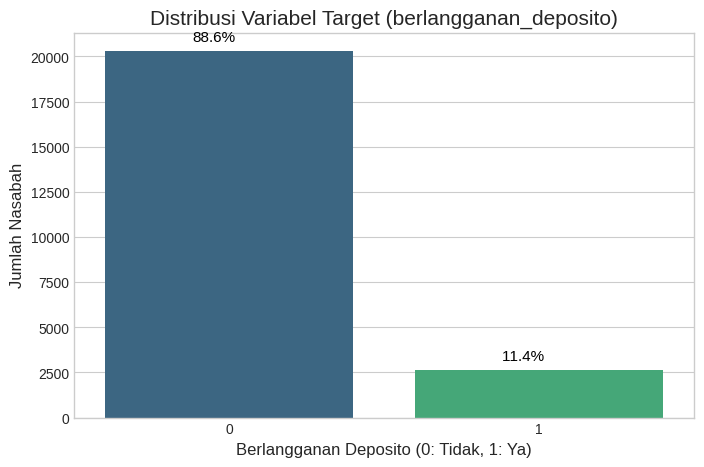

In [47]:
if not df_train.empty and 'berlangganan_deposito' in df_train.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='berlangganan_deposito', data=df_train, palette='viridis')
    plt.title('Distribusi Variabel Target (berlangganan_deposito)', fontsize=15)
    plt.xlabel('Berlangganan Deposito (0: Tidak, 1: Ya)', fontsize=12)
    plt.ylabel('Jumlah Nasabah', fontsize=12)
    # Menambahkan persentase pada bar
    total = len(df_train['berlangganan_deposito'])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        plt.gca().annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11, color='black', xytext=(0,5), textcoords='offset points')
    plt.show()
else:
    print("Tidak dapat membuat visualisasi: kolom target tidak ditemukan atau df_train kosong.")